In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.metrics import mean_absolute_error
from matplotlib.patches import Rectangle
%matplotlib inline

In [2]:
data_dir = "/cluster/tufts/hugheslab/prath01/projects/time_series_prediction/datasets/toy_overheat/v20200515"

In [9]:
no_imp_df = pd.read_csv(os.path.join(data_dir, "features_2d_per_tstep_no_imp_observed=40_perc.csv"))
mean_imp_df = pd.read_csv(os.path.join(data_dir, "features_2d_per_tstep_mean_imp_observed=40_perc.csv"))
ffill_imp_df = pd.read_csv(os.path.join(data_dir, "features_2d_per_tstep_ffill_imp_observed=40_perc.csv"))
outcomes_df = pd.read_csv(os.path.join(data_dir, 'outcomes_per_seq.csv'))



## Plot the original data without any missing dimensions and only the imputed values via ffill and mean imp

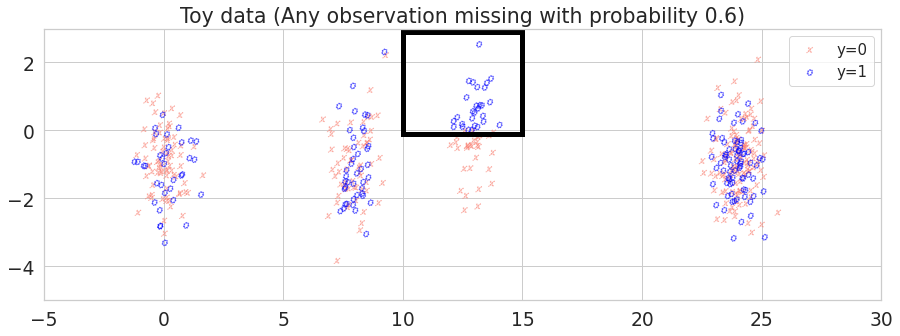

In [67]:
f,axs = plt.subplots(1,1, figsize=(15, 5))
sns.set_context("notebook", font_scale=1.7)
sns.set_style("whitegrid") # or use "white" if we don't want grid lines
features_outcomes_df = pd.merge(no_imp_df, outcomes_df, on=['sequence_id'])
feature_columns = ['temperature_1', 'temperature_2']
inds_label_0 = features_outcomes_df['did_overheat_binary_label']==0
inds_label_1 = features_outcomes_df['did_overheat_binary_label']==1
feature_vals_ND_labels_0 = features_outcomes_df[inds_label_0][feature_columns].values
feature_vals_ND_labels_1 = features_outcomes_df[inds_label_1][feature_columns].values


# plot time series sequence of example with label 0 and 1
axs.scatter(feature_vals_ND_labels_0[:, 0], feature_vals_ND_labels_0[:, 1], 
            marker='$x$', color='salmon', linestyle=':', alpha=0.5, label='y=0')
axs.scatter(feature_vals_ND_labels_1[:, 0], feature_vals_ND_labels_1[:, 1], 
            marker='$o$', color='b', linestyle=':', alpha=0.5, label='y=1')


axs.add_patch(Rectangle((10, 2.9), 5, -3,
             edgecolor = 'k',
             fill=False,
             lw=5))

axs.set_xlim([-5, 30])
axs.set_ylim([-5, 3])
axs.legend(fontsize=15)
axs.set_title('Toy data (Any observation missing with probability 0.6)')
f.savefig('no_imp_toy.pdf', bbox_inches='tight', pad_inches=0)
plt.show()


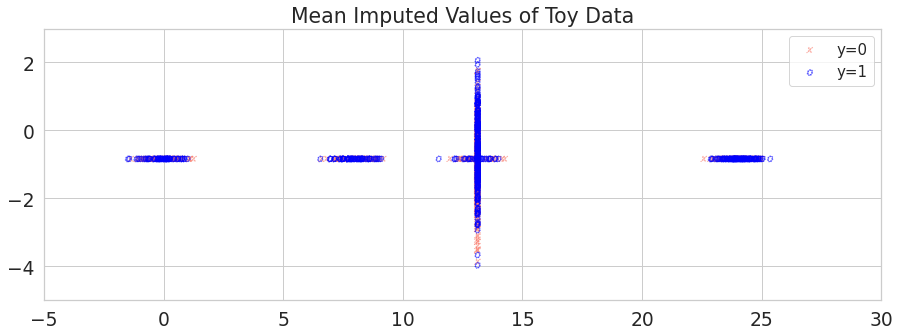

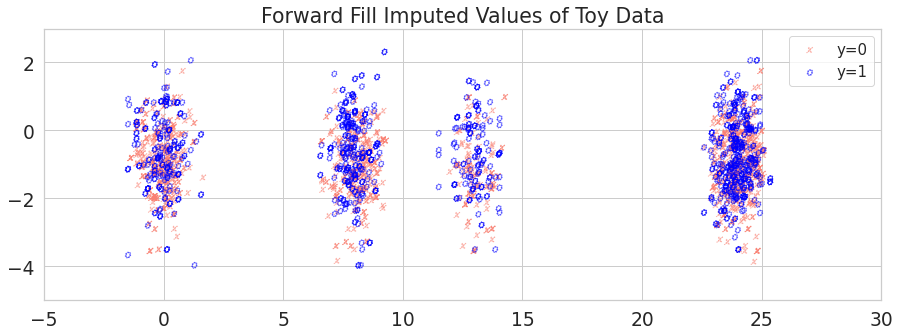

In [68]:
for feat_df, feat_fig_aka, feat_title in [(mean_imp_df, 'mean_imp_toy', 'Mean Imputed Values of Toy Data'), 
                (ffill_imp_df, 'ffill_imp_toy', 'Forward Fill Imputed Values of Toy Data')]:
    f,axs = plt.subplots(1,1, figsize=(15, 5))
    sns.set_context("notebook", font_scale=1.7)
    sns.set_style("whitegrid") # or use "white" if we don't want grid lines
    features_outcomes_df = pd.merge(feat_df, outcomes_df, on=['sequence_id'])
    feature_columns = ['temperature_1', 'temperature_2']
    inds_label_0 = (features_outcomes_df['did_overheat_binary_label']==0)&(no_imp_df.isna().any(axis=1))
    inds_label_1 = (features_outcomes_df['did_overheat_binary_label']==1)&(no_imp_df.isna().any(axis=1))
    feature_vals_ND_labels_0 = features_outcomes_df[inds_label_0][feature_columns].values
    feature_vals_ND_labels_1 = features_outcomes_df[inds_label_1][feature_columns].values


    # plot time series sequence of example with label 0 and 1
    axs.scatter(feature_vals_ND_labels_0[:, 0], feature_vals_ND_labels_0[:, 1], 
                marker='$x$', color='salmon', linestyle=':', alpha=0.5, label='y=0')
    axs.scatter(feature_vals_ND_labels_1[:, 0], feature_vals_ND_labels_1[:, 1], 
                marker='$o$', color='b', linestyle=':', alpha=0.5, label='y=1')

    axs.set_xlim([-5, 30])
    axs.set_ylim([-5, 3])
    axs.legend(fontsize=15)
    axs.set_title(feat_title)
    f.savefig(feat_fig_aka+'.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()

In [34]:
all_vals = np.ravel(no_imp_df[feature_columns].values)
np.isnan(all_vals).sum()/len(all_vals)

0.6

In [31]:
feat_df

,sequence_id,timestep,temperature_1,temperature_2
0,0,0,0.036099,-3.308175
1,0,1,8.263370,-3.308175
2,0,2,8.603111,-3.308175
3,0,3,8.603111,-3.308175
4,0,4,8.603111,-3.308175
...,...,...,...,...
2795,349,3,0.036096,-1.829326
2796,349,4,0.036096,0.103477
2797,349,5,23.855439,-2.081657
2798,349,6,23.818067,-2.081657
